In [21]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Conv2D, Input, MaxPooling2D, Dropout, concatenate, UpSampling2D
import numpy as np
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import os
from keras.preprocessing.image import array_to_img

import matplotlib.pyplot as plt


train = np.load('/shuyc_tmp/models/tensorflow/uNet/skin_dataset/data_train.npy')
mask = np.load('/shuyc_tmp/models/tensorflow/uNet/skin_dataset/mask_train.npy')
test = np.load('/shuyc_tmp/models/tensorflow/uNet/skin_dataset/data_test.npy')
train = train.astype('float32')
train = train/255.
mask = mask /mask.max()

test = test.reshape((test.shape[0],256,256,3))
test = test.astype('float32')
test = test/255.
train = train.reshape(train.shape[0], 256, 256, 3)
mask = mask.reshape(mask.shape[0], 256, 256, 1)

##train = train[0]



def Unet():
    inputs = Input(shape=[256, 256, 3])
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)
    model = Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer=Adam(lr=1e-4),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [28]:
unet = Unet()
model_checkpoint = ModelCheckpoint('./uNet_Skin.hdf5',monitor='loss',verbose=1,save_best_only=True)
history = unet.fit(train, mask, batch_size=4, epochs=30, verbose=1, 
                   validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])


Train on 1452 samples, validate on 363 samples
Epoch 1/30
1452/1452 [==============================] - 44s 30ms/step - loss: 0.4101 - accuracy: 0.8036 - val_loss: 0.3145 - val_accuracy: 0.8754

Epoch 00001: loss improved from inf to 0.41011, saving model to ./uNet_Skin.hdf5
Epoch 2/30
1452/1452 [==============================] - 41s 28ms/step - loss: 0.3307 - accuracy: 0.8744 - val_loss: 0.2614 - val_accuracy: 0.9208

Epoch 00002: loss improved from 0.41011 to 0.33073, saving model to ./uNet_Skin.hdf5
Epoch 3/30
1452/1452 [==============================] - 41s 28ms/step - loss: 0.2921 - accuracy: 0.9007 - val_loss: 0.2481 - val_accuracy: 0.9120

Epoch 00003: loss improved from 0.33073 to 0.29211, saving model to ./uNet_Skin.hdf5
Epoch 4/30
1452/1452 [==============================] - 41s 28ms/step - loss: 0.2836 - accuracy: 0.9028 - val_loss: 0.2642 - val_accuracy: 0.9064

Epoch 00004: loss improved from 0.29211 to 0.28362, saving model to ./uNet_Skin.hdf5
Epoch 5/30
1452/1452 [=======

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


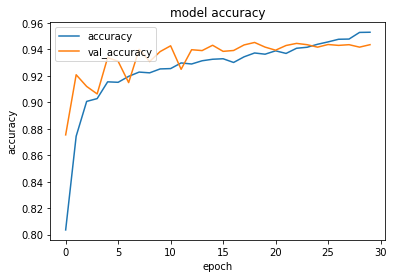

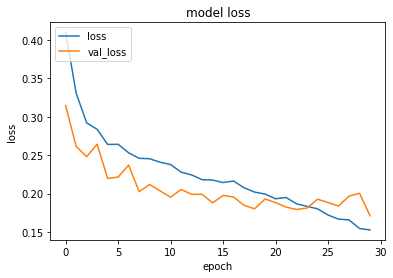

In [29]:
print(history.history.keys())

# 展示一下精确度随训练的变化图
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

# 展示一下loss随训练的变化图
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()



In [ ]:

predict_imgs = unet.predict(test, batch_size=1, verbose=1)
predict_imgs = predict_imgs * 255
# print(predict_imgs[0])
predict_imgs = np.clip(predict_imgs,0,255)
# print(predict_imgs[0])
if not os.path.exists('./results'):
    os.makedirs('./results')
np.save('./results/predict.npy',predict_imgs)


def save_img():

    imgs = np.load('./results/predict.npy')
    for i in range(imgs.shape[0]):
        img = imgs[i]
        img = array_to_img(img)
        img.save("./data_out/%d.jpg" % (i))

save_img()